In [1]:
import os
import re

import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
import numpy as np
import pandas as pd
import sklearn
from sklearn import cross_validation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
model_dir = '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/imagenet/'
images_dir = '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/'
list_images = [images_dir+f for f in os.listdir(images_dir) if re.search('jpg|jpeg', f)]
print(list_images)
#print(unicode(os.listdir(images_dir)[0],"utf-8"))
#print([f for f in os.listdir(images_dir)] )#if re.search('jpg|JPG', f))

['/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/w3.jpg', '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/w4.jpg', '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/l1.jpg', '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/w1.jpg', '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/l2.jpg', '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/w2.jpg']


In [3]:
model_dir = '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/imagenet/'
images_dir = '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/'
list_images1 = [images_dir+f for f in os.listdir(images_dir) if re.search('jpg|jpeg', f)]
print(list_images1)

['/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/w32.jpg', '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/l12.jpg', '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/w22.jpg', '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/l22.jpg', '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/w12.jpg', '/home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/w42.jpg']


In [4]:
def create_graph():
    with gfile.FastGFile(os.path.join( model_dir, 'classify_image_graph_def.pb'), 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(graph_def, name='')

In [5]:
def extract_features(list_images):
    nb_features = 2048
    features = np.empty((len(list_images),nb_features))
    labels = []

    create_graph()

    with tf.Session() as sess:

        next_to_last_tensor = sess.graph.get_tensor_by_name('pool_3:0')
        print(next_to_last_tensor)
        for ind, image in enumerate(list_images):
            print(ind)
            
            if (ind%1 == 0):
                print('Processing %s...' % (image))
            if not gfile.Exists(image):
                tf.logging.fatal('File does not exist %s', image)

            image_data = gfile.FastGFile(image, 'rb').read()
            predictions = sess.run(next_to_last_tensor,{'DecodeJpeg/contents:0': image_data})
            features[ind,:] = np.squeeze(predictions)
            labels.append(re.split('_\w',image.split('images/')[1][0])[0])
            #labels.append(str(ind))
        return features, labels
    
    
def extract_features1(list_images):
    nb_features = 2048
    features = np.empty((len(list_images),nb_features))
    labels = []

    create_graph()

    with tf.Session() as sess:

        next_to_last_tensor = sess.graph.get_tensor_by_name('pool_3:0')
        print(next_to_last_tensor)
        for ind, image in enumerate(list_images):
            print(ind)
            
            if (ind%1 == 0):
                print('Processing %s...' % (image))
            if not gfile.Exists(image):
                tf.logging.fatal('File does not exist %s', image)

            image_data = gfile.FastGFile(image, 'rb').read()
            predictions = sess.run(next_to_last_tensor,{'DecodeJpeg/contents:0': image_data})
            features[ind,:] = np.squeeze(predictions)
            labels.append(re.split('_\w',image.split('test/')[1][0])[0])
            #labels.append(str(ind))
        return features, labels

In [6]:
features,labels = extract_features(list_images)
print(features)
print(labels)

Tensor("pool_3:0", shape=(1, 1, 1, 2048), dtype=float32)
0
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/w3.jpg...
1
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/w4.jpg...
2
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/l1.jpg...
3
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/w1.jpg...
4
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/l2.jpg...
5
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/images/w2.jpg...
[[0.3555539  0.50857168 0.63174373 ... 0.60597217 0.58060032 0.30671123]
 [0.6719197  0.29546505 0.4758167  ... 0.84033346 0.00775583 0.13520625]
 [0.46656391 0.68050802 0.43136528 ... 0.11066197 0.14071111 0.13320234]
 [0.27992278 0.1384397  0.08369043 ... 0.64568913 0.16410938 0.3

In [7]:
features1,labels1 = extract_features1(list_images1)
print(features1)
print(labels1)

Tensor("pool_3:0", shape=(1, 1, 1, 2048), dtype=float32)
0
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/w32.jpg...
1
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/l12.jpg...
2
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/w22.jpg...
3
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/l22.jpg...
4
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/w12.jpg...
5
Processing /home/king/DeepLearning/DeepVision/models/tutorials/image/imagenet/TUTORIAL_DIR/test/w42.jpg...
[[0.31673449 0.34028953 0.753313   ... 0.73051196 0.26639581 0.21832292]
 [0.11238895 0.1224974  0.32951522 ... 0.81839436 0.3834646  0.07008538]
 [0.2895399  0.33873001 0.4128781  ... 0.57155031 0.14514376 0.24866773]
 [0.14201017 0.1697218  0.12953095 ... 0.         0.19650076 0.1178429

In [8]:
create_graph()
image = '/home/king/DeepLearning/DeepVision/resized_image0.jpg'
with tf.Session() as sess:
    print('Processing %s...' % (image))
    image_data = gfile.FastGFile(image, 'rb').read()
    
    next_to_last_tensor = sess.graph.get_tensor_by_name('pool_3:0')
    print(next_to_last_tensor)
    predictions = sess.run(next_to_last_tensor,{'DecodeJpeg/contents:0': image_data})
    print(predictions)

Processing /home/king/DeepLearning/DeepVision/resized_image0.jpg...
Tensor("pool_3:0", shape=(1, 1, 1, 2048), dtype=float32)
[[[[0.6392621  0.5341328  0.6785944  ... 0.7030274  0.8636828
    0.18189038]]]]


In [10]:
import PIL
from PIL import Image
for ind, image in enumerate(list_images):
    img = Image.open(image)
    img = img.resize((150, 150), PIL.Image.ANTIALIAS)
    img.save('resized_image'+str(ind)+'.jpg')

In [11]:
pickle.dump(features, open('features', 'wb'))
pickle.dump(labels, open('labels', 'wb'))


In [12]:
pickle.dump(features1, open('features', 'wb'))
pickle.dump(labels1, open('labels', 'wb'))

In [13]:
features = pickle.load(open('features'))
labels = pickle.load(open('labels'))


In [14]:
features1 = pickle.load(open('features'))
labels1 = pickle.load(open('labels'))

In [15]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, labels, test_size=0.0, random_state=0)
X_train1, X_test1, y_train1, y_test1 = cross_validation.train_test_split(features1, labels1, test_size=0.825, random_state=0)

In [16]:
clf = LinearSVC(C=1.0, loss='squared_hinge', penalty='l2',multi_class='ovr')
clf.fit(X_train, y_train)
#print(X_train)
print(y_test1)
y_pred = clf.predict(X_test1)
print("=======================================================")
print(y_pred)

['w', 'w', 'l', 'l', 'w']
['w' 'w' 'l' 'l' 'w']


In [17]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test1,y_pred)*100))

Accuracy: 100.0%


In [18]:
def plot_confusion_matrix(y_true,y_pred):
    cm_array = confusion_matrix(y_true,y_pred)
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    plt.imshow(cm_array[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

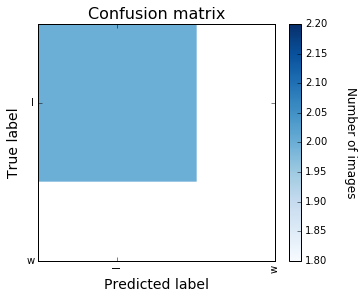

In [19]:
plot_confusion_matrix(y_test1,y_pred)